### Analyzing Fake Leads and How to Disqualify Them

In the following code, we will conduct a small analysis on fake leads that enter the funnel. The goal is to identify characteristics or patterns in the data that allow us to disqualify these leads as soon as they are captured, ensuring more accurate and efficient lead management.

By examining the attributes of the leads, such as their source, engagement behavior, or demographic information, we can establish criteria for identifying and removing fake leads early in the process.

This analysis will help optimize the conversion rates by focusing efforts on high-quality prospects while minimizing resources spent on invalid leads.

In [1]:
import pandas as pd
import numpy as np
import re
import shutil  # For file copying
from googletrans import Translator
from deep_translator import GoogleTranslator
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
fl = pd.read_csv('/Users/teitelbaumsair/Desktop/Open-Source-Projects/Connecteam BOM Assignment/fake_leads.csv')
fl 


,Company number,Job Title,Industry,Main Company Interest,Country,Country Region,Channel Group (Inbound),Device Category,Num of Employees,Signup Timestamp Date,Conversion to Mql Timestamp Date,First Demo Date Date,Conversion to Paid Timestamp Date,Arr At Conversion
0,2,xb,retail,taskManagement,Afghanistan,ArabStates,mobile,Mobile,"3,000",14/06/2024,NaN,NaN,NaN,NaN
1,4,nxn,retail,taskManagement,Afghanistan,ArabStates,mobile,Mobile,"3,000",14/06/2024,NaN,NaN,NaN,NaN
2,5,vbb,retail,taskManagement,Afghanistan,ArabStates,mobile,Mobile,"3,000",14/06/2024,NaN,NaN,NaN,NaN
3,8,xb,foodBeverages,taskManagement,Afghanistan,ArabStates,mobile,Mobile,"3,000",14/06/2024,NaN,NaN,NaN,NaN
4,10,jdjdjeb,retail,taskManagement,Afghanistan,ArabStates,mobile,Mobile,"3,000",14/06/2024,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,3587,◊ô◊¶◊ï◊®,construction,general,Israel,Israel,direct,Mobile,"3,000",03/06/2024,NaN,NaN,NaN,NaN
299,3675,◊ô◊ô◊¶◊ï◊®,manufacturing,general,Israel,Israel,mobile,Mobile,20,02/06/2024,NaN,NaN,NaN,NaN
300,3681,"◊û◊†◊õ""◊ú",transportation,general,Israel,Israel,cpc-google_il,PC,350,02/06/2024,NaN,NaN,NaN,NaN
301,3828,Propriet√°rio,construction,checklists,Brazil,SouthAmerica,cpc-google,PC,20,01/06/2024,NaN,NaN,NaN,NaN


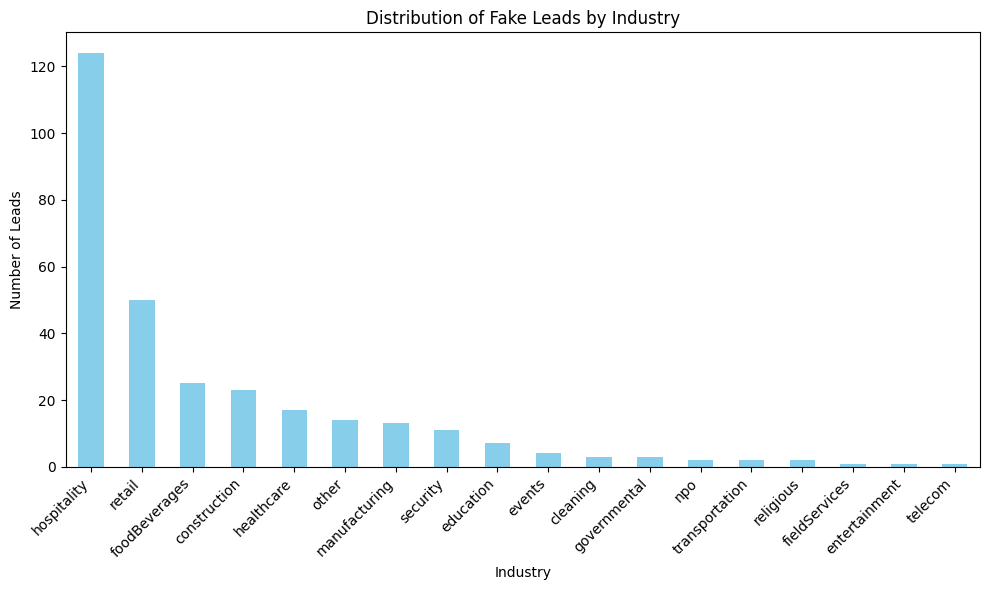

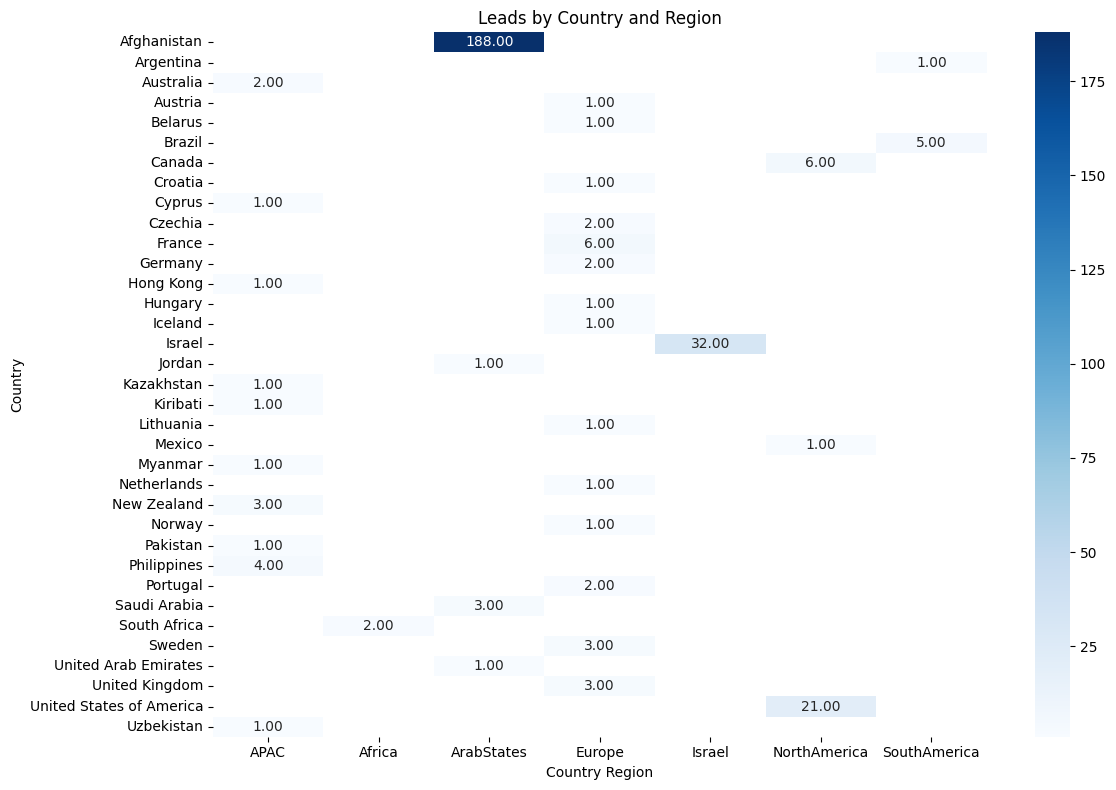

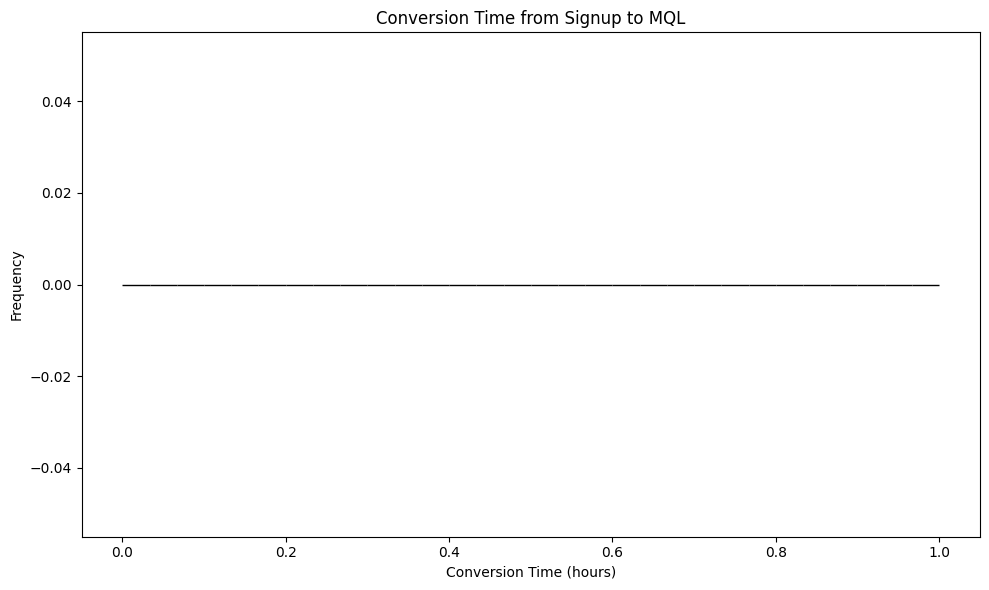

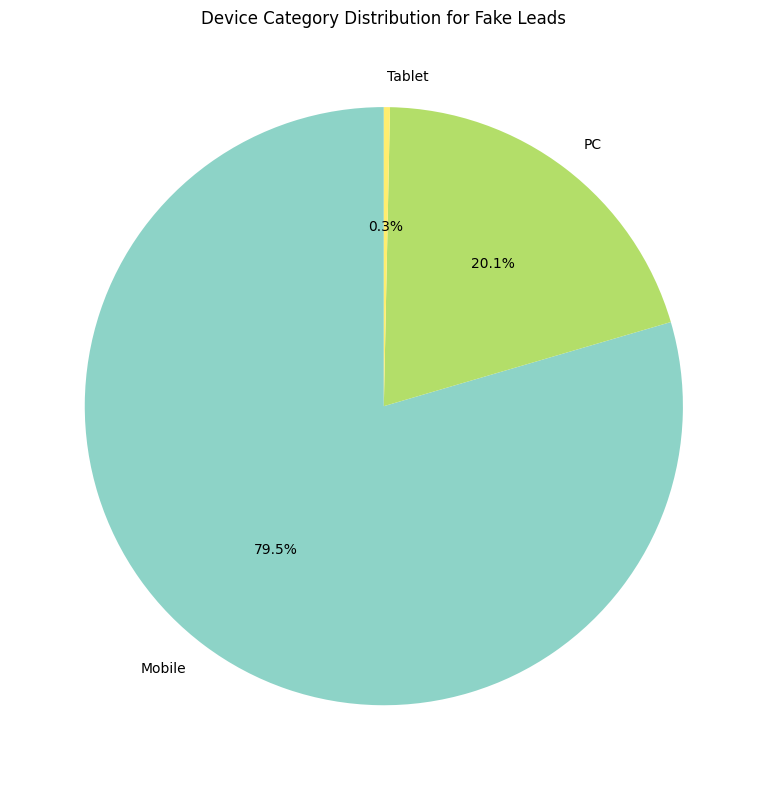

In [4]:

# 1. Distribution of Fake Leads by Industry
industry_counts = fl['Industry'].value_counts()

plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Fake Leads by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Leads by Country and Region (Heatmap)
country_region_counts = fl.groupby(['Country', 'Country Region']).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(country_region_counts, annot=True, cmap='Blues', fmt='.2f')  # Change fmt to '.2f' for float format
plt.title('Leads by Country and Region')
plt.xlabel('Country Region')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 3. Conversion Time Analysis (Time between Signup to MQL)
fl['Signup Timestamp Date'] = pd.to_datetime(fl['Signup Timestamp Date'])
fl['Conversion to Mql Timestamp Date'] = pd.to_datetime(fl['Conversion to Mql Timestamp Date'])

fl['conversion_time'] = (fl['Conversion to Mql Timestamp Date'] - fl['Signup Timestamp Date']).dt.total_seconds() / 3600  # hours

plt.figure(figsize=(10, 6))
sns.histplot(fl['conversion_time'], bins=30, kde=True, color='purple')
plt.title('Conversion Time from Signup to MQL')
plt.xlabel('Conversion Time (hours)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Device Category vs Conversion Rate (Pie Chart)
device_conversion_rate = fl.groupby('Device Category').size()

plt.figure(figsize=(8, 8))
device_conversion_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Device Category Distribution for Fake Leads')
plt.ylabel('')  # Remove the default ylabel
plt.tight_layout()
plt.show()